In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import os
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import Counter
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [3]:
import datetime
from tqdm import tqdm
from dateutil.relativedelta import relativedelta

In [4]:
newsResult = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BDA/news3_pred.csv')
newsResult['date'] = pd.to_datetime(newsResult['date']).dt.date

mobileResult = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BDA/SVM_pred_result.csv')
mobileResult['date'] = pd.to_datetime(mobileResult['date']).dt.date

pttResult = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BDA/Prediction_PTT_20220601_20240226.csv')
pttResult['date'] = pd.to_datetime(pttResult['date']).dt.date

dcardResult = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BDA/Prediction_dcard.csv')
dcardResult['date'] = pd.to_datetime(dcardResult['date']).dt.date

news_Result = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BDA/news1&2_pred.csv')
news_Result['date'] = pd.to_datetime(news_Result['date']).dt.date

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/BDA/news3_pred.csv'

In [ ]:
pttResult

,date,result
0,2022-06-01,-1
1,2022-06-02,-1
2,2022-06-06,-1
3,2022-06-07,-1
4,2022-06-08,-1
...,...,...
417,2024-02-20,0
418,2024-02-21,0
419,2024-02-22,0
420,2024-02-23,0


In [ ]:
mobileResult.loc[mobileResult.SVM_predict == '跌', "result"] = -1
mobileResult.loc[mobileResult.SVM_predict == '漲', "result"] = 1
mobileResult

,date,SVM_predict,result
0,2022-06-01,跌,-1.0
1,2022-06-02,跌,-1.0
2,2022-06-06,跌,-1.0
3,2022-06-07,跌,-1.0
4,2022-06-08,跌,-1.0
...,...,...,...
417,2024-02-20,漲,1.0
418,2024-02-21,漲,1.0
419,2024-02-22,漲,1.0
420,2024-02-23,漲,1.0


In [ ]:
newsResult

,date,result
0,2022-06-01,-1
1,2022-06-02,-1
2,2022-06-03,0
3,2022-06-04,-1
4,2022-06-05,-1
...,...,...
634,2024-02-25,1
635,2024-02-26,1
636,2024-02-27,1
637,2024-02-28,1


In [ ]:
dcardResult

,date,result
0,2022-06-01,-1
1,2022-06-02,-1
2,2022-06-06,-1
3,2022-06-07,-1
4,2022-06-08,-1
...,...,...
417,2024-02-20,0
418,2024-02-21,0
419,2024-02-22,0
420,2024-02-23,0


In [ ]:
news_Result

In [ ]:
startDate = datetime.date(2022,6,1)
resultList = []
dateList = []

while (startDate <= datetime.date(2024,2,29)):
  frameLoop = [newsResult, mobileResult, pttResult, dcardResult, news_Result]
  pred = 0
  sum = 0
  for frame in frameLoop:
    result = frame[frame['date'] == startDate]['result']
    if result.empty:
      sum += 0
    else:
      sum += int(result.values[0])
  pred = 1 if sum > 0 else 0 if sum == 0 else -1
  print(startDate, pred)
  resultList.append(pred)
  dateList.append(startDate)
  startDate = startDate + timedelta(days=1)

mergeResult = pd.DataFrame(list(zip(dateList, resultList)),columns =['date', 'result'])
mergeResult.to_csv('/content/drive/My Drive/Colab Notebooks/mergeResult.csv')

2022-06-01 -1
2022-06-02 -1
2022-06-03 0
2022-06-04 -1
2022-06-05 -1
2022-06-06 -1
2022-06-07 -1
2022-06-08 -1
2022-06-09 -1
2022-06-10 -1
2022-06-11 0
2022-06-12 1
2022-06-13 -1
2022-06-14 -1
2022-06-15 -1
2022-06-16 -1
2022-06-17 -1
2022-06-18 -1
2022-06-19 1
2022-06-20 -1
2022-06-21 -1
2022-06-22 -1
2022-06-23 -1
2022-06-24 -1
2022-06-25 1
2022-06-26 1
2022-06-27 -1
2022-06-28 -1
2022-06-29 -1
2022-06-30 0
2022-07-01 -1
2022-07-02 -1
2022-07-03 -1
2022-07-04 -1
2022-07-05 -1
2022-07-06 -1
2022-07-07 -1
2022-07-08 -1
2022-07-09 -1
2022-07-10 -1
2022-07-11 -1
2022-07-12 -1
2022-07-13 -1
2022-07-14 -1
2022-07-15 -1
2022-07-16 -1
2022-07-17 -1
2022-07-18 -1
2022-07-19 -1
2022-07-20 -1
2022-07-21 -1
2022-07-22 -1
2022-07-23 -1
2022-07-24 -1
2022-07-25 -1
2022-07-26 -1
2022-07-27 -1
2022-07-28 -1
2022-07-29 -1
2022-07-30 -1
2022-07-31 -1
2022-08-01 1
2022-08-02 0
2022-08-03 0
2022-08-04 0
2022-08-05 -1
2022-08-06 -1
2022-08-07 1
2022-08-08 -1
2022-08-09 0
2022-08-10 0
2022-08-11 0
2022-08

In [ ]:
mergeResult['result'].value_counts()

result
 1    341
-1    210
 0     88
Name: count, dtype: int64

In [ ]:
#計算出手率
(mergeResult['result'].value_counts()[1] + mergeResult['result'].value_counts()[-1]) / len(mergeResult['result'])

0.8622848200312989

In [ ]:
mergeResult

,date,result
0,2022-06-01,-1
1,2022-06-02,-1
2,2022-06-03,0
3,2022-06-04,-1
4,2022-06-05,-1
...,...,...
634,2024-02-25,1
635,2024-02-26,1
636,2024-02-27,1
637,2024-02-28,1


In [ ]:
trueResult = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BDA/priceResult.csv')
trueResult['date'] = pd.to_datetime(trueResult['date']).dt.date

In [ ]:
trueResult

,Unnamed: 0,date,result
0,0,2022-06-01,-1
1,1,2022-06-02,-1
2,2,2022-06-03,-1
3,3,2022-06-04,-1
4,4,2022-06-05,-1
...,...,...,...
606,606,2024-01-28,1
607,607,2024-01-29,1
608,608,2024-01-30,1
609,609,2024-01-31,1


In [ ]:
trueResult['result'].value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [ ]:
predResult = mergeResult[mergeResult['date'].isin(trueResult['date'])]
predResult

,date,result
0,2022-06-01,-1
1,2022-06-02,-1
2,2022-06-03,0
3,2022-06-04,-1
4,2022-06-05,-1
...,...,...
606,2024-01-28,1
607,2024-01-29,1
608,2024-01-30,1
609,2024-01-31,1


In [ ]:
accuracy_score(trueResult['result'], predResult['result'])

0.4206219312602291

[[ 72  34  83]
 [ 44  24  72]
 [ 94  27 161]]


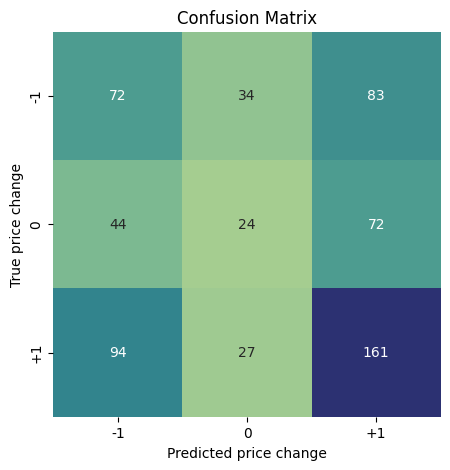

In [ ]:
cm = confusion_matrix(trueResult['result'], predResult['result'])
class_labels = ['-1', '0', '+1']
print(cm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="crest", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted price change")
plt.ylabel("True price change")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
trueResult

,Unnamed: 0,date,result
0,0,2022-06-01,-1
1,1,2022-06-02,-1
2,2,2022-06-03,-1
3,3,2022-06-04,-1
4,4,2022-06-05,-1
...,...,...,...
606,606,2024-01-28,1
607,607,2024-01-29,1
608,608,2024-01-30,1
609,609,2024-01-31,1


In [ ]:
trueResult['result'].value_counts()

result
 1    282
-1    189
 0    140
Name: count, dtype: int64

In [ ]:
from dateutil.relativedelta import relativedelta
test = 0
month = []
accMonth = []
from statistics import mean

for i in range(0, 20):
  startDate = datetime.date(2022,6,1) + relativedelta(months=i)
  endDate = datetime.date(2022,7,1) + relativedelta(months=i) - timedelta(days=1)
  true = trueResult[trueResult['date'].between(startDate, endDate)]['result']
  pred = predResult[predResult['date'].between(startDate, endDate)]['result']
  cm = confusion_matrix(true, pred)
  if (cm.size == 9):
    acc = (cm[0][0] + cm[2][2]) / (cm[0][0] + cm[2][2] + cm[0][2] + cm[2][0])
  else:
    acc = accuracy_score(true, pred)
  month.append(endDate)
  accMonth.append(acc)
mean(accMonth)

0.5509692467034979

In [ ]:
month

[datetime.date(2022, 6, 30),
 datetime.date(2022, 7, 31),
 datetime.date(2022, 8, 31),
 datetime.date(2022, 9, 30),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 30),
 datetime.date(2022, 12, 31),
 datetime.date(2023, 1, 31),
 datetime.date(2023, 2, 28),
 datetime.date(2023, 3, 31),
 datetime.date(2023, 4, 30),
 datetime.date(2023, 5, 31),
 datetime.date(2023, 6, 30),
 datetime.date(2023, 7, 31),
 datetime.date(2023, 8, 31),
 datetime.date(2023, 9, 30),
 datetime.date(2023, 10, 31),
 datetime.date(2023, 11, 30),
 datetime.date(2023, 12, 31),
 datetime.date(2024, 1, 31)]

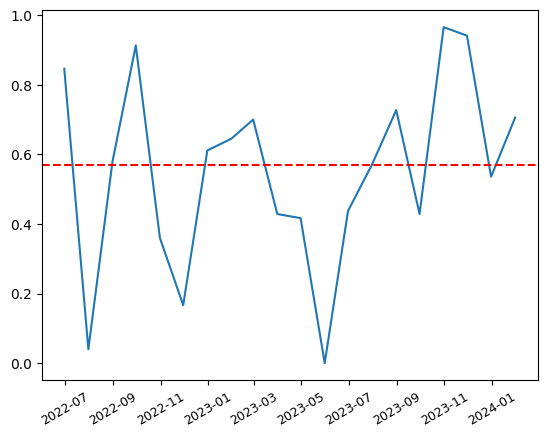

In [ ]:
plt.plot(month, accMonth)
plt.axhline(y = 0.568, color = 'r', linestyle = 'dashed')
plt.xticks(rotation=30, fontsize=9)
plt.show()